In [1]:
pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import splitfolders

In [ ]:
input_folder="/content/drive/MyDrive/dummy_sugarcane"
output="/content/final"
splitfolders.ratio(input_folder,output,seed=42,ratio=(.8,.1,.1))

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [6]:
img_height,img_width=224,224
batch_size=32
train='/content/final/val'
valid='/content/final/train'
test='/content/final/test'

In [7]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    input_folder,
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 1500 files belonging to 4 classes.
Using 1200 files for training.


In [8]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    input_folder,
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 1500 files belonging to 4 classes.
Using 300 files for validation.


In [9]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [10]:
# Initializing the CNN
model = Sequential()
# Convolution Step 1
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))
# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
# Convolution Step 2
model.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))
# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
model.add(BatchNormalization())
# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))
# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
# Flattening Step
model.add(Flatten())
# Full Connection Step
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 1000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units = len(train_ds.class_names), activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                        

In [11]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [14]:
epochs=20
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
38/38 [==============================] - 210s 5s/step - loss: 0.5534 - accuracy: 0.7975 - val_loss: 1.5688 - val_accuracy: 0.6200
Epoch 2/20
38/38 [==============================] - 202s 5s/step - loss: 0.4971 - accuracy: 0.7775 - val_loss: 0.6494 - val_accuracy: 0.7600
Epoch 3/20
38/38 [==============================] - 202s 5s/step - loss: 0.3721 - accuracy: 0.8375 - val_loss: 1.2073 - val_accuracy: 0.6667
Epoch 4/20
38/38 [==============================] - 215s 6s/step - loss: 0.3931 - accuracy: 0.8333 - val_loss: 1.0654 - val_accuracy: 0.7300
Epoch 5/20
38/38 [==============================] - 216s 6s/step - loss: 0.4213 - accuracy: 0.8342 - val_loss: 2.7021 - val_accuracy: 0.5500
Epoch 6/20
38/38 [==============================] - 210s 5s/step - loss: 0.3251 - accuracy: 0.8692 - val_loss: 1.6611 - val_accuracy: 0.6400
Epoch 7/20
38/38 [==============================] - 202s 5s/step - loss: 0.3630 - accuracy: 0.8558 - val_loss: 2.0806 - val_accuracy: 0.5633
Epoch 8/20
38

In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/alexnet.h5')

In [ ]:
loaded=tf.keras.models.load_model('/content/drive/MyDrive/alexnet.h5')

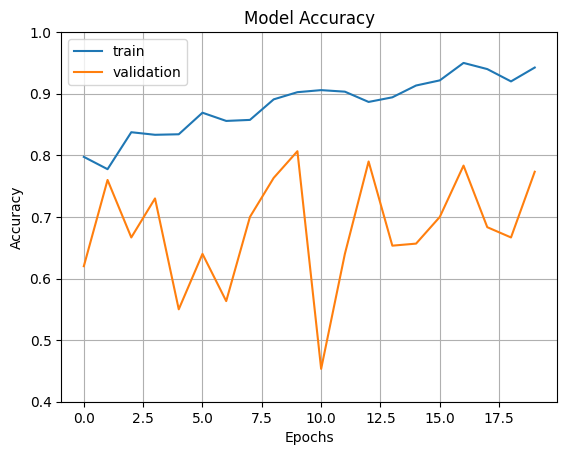

In [15]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()